In \[46\]:

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    from sklearn import preprocessing
    from sklearn.preprocessing import LabelEncoder
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix

    # Load data from an Excel sheet (replace 'your_dataset.xlsx' with your file path)
    df = pd.read_csv('heart.csv')
    df.head()

Out\[46\]:

|     | Age | Sex | ChestPainType | RestingBP | Cholesterol | FastingBS | RestingECG | MaxHR | ExerciseAngina | Oldpeak | ST_Slope | HeartDisease |
|-----|-----|-----|---------------|-----------|-------------|-----------|------------|-------|----------------|---------|----------|--------------|
| 0   | 40  | M   | ATA           | 140       | 289         | 0         | Normal     | 172   | N              | 0.0     | Up       | 0            |
| 1   | 49  | F   | NAP           | 160       | 180         | 0         | Normal     | 156   | N              | 1.0     | Flat     | 1            |
| 2   | 37  | M   | ATA           | 130       | 283         | 0         | ST         | 98    | N              | 0.0     | Up       | 0            |
| 3   | 48  | F   | ASY           | 138       | 214         | 0         | Normal     | 108   | Y              | 1.5     | Flat     | 1            |
| 4   | 54  | M   | NAP           | 150       | 195         | 0         | Normal     | 122   | N              | 0.0     | Up       | 0            |

In \[47\]:

    df.shape

Out\[47\]:

    (918, 12)

In \[48\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 918 entries, 0 to 917
    Data columns (total 12 columns):
     #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
     0   Age             918 non-null    int64  
     1   Sex             918 non-null    object 
     2   ChestPainType   918 non-null    object 
     3   RestingBP       918 non-null    int64  
     4   Cholesterol     918 non-null    int64  
     5   FastingBS       918 non-null    int64  
     6   RestingECG      918 non-null    object 
     7   MaxHR           918 non-null    int64  
     8   ExerciseAngina  918 non-null    object 
     9   Oldpeak         918 non-null    float64
     10  ST_Slope        918 non-null    object 
     11  HeartDisease    918 non-null    int64  
    dtypes: float64(1), int64(6), object(5)
    memory usage: 86.2+ KB

In \[49\]:

    columns_to_encode = ['RestingECG','ExerciseAngina','ST_Slope','ChestPainType','Sex']
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for column in columns_to_encode:
        df[column] = le.fit_transform(df[column])
        
    X = df.drop('HeartDisease',axis = 1)
    y = df['HeartDisease']

In \[50\]:

    df.head()

Out\[50\]:

|     | Age | Sex | ChestPainType | RestingBP | Cholesterol | FastingBS | RestingECG | MaxHR | ExerciseAngina | Oldpeak | ST_Slope | HeartDisease |
|-----|-----|-----|---------------|-----------|-------------|-----------|------------|-------|----------------|---------|----------|--------------|
| 0   | 40  | 1   | 1             | 140       | 289         | 0         | 1          | 172   | 0              | 0.0     | 2        | 0            |
| 1   | 49  | 0   | 2             | 160       | 180         | 0         | 1          | 156   | 0              | 1.0     | 1        | 1            |
| 2   | 37  | 1   | 1             | 130       | 283         | 0         | 2          | 98    | 0              | 0.0     | 2        | 0            |
| 3   | 48  | 0   | 0             | 138       | 214         | 0         | 1          | 108   | 1              | 1.5     | 1        | 1            |
| 4   | 54  | 1   | 2             | 150       | 195         | 0         | 1          | 122   | 0              | 0.0     | 2        | 0            |

In \[51\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In \[52\]:

    # Logistic Regression
    logistic_model = LogisticRegression(max_iter=10000)
    logistic_model.fit(X_train, y_train)
    logistic_predictions = logistic_model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,logistic_predictions,labels=[1,0])
    df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],columns=[i for i in["Predict 1","Predict 0"]])
    plt.title('\nLogistic Regression confusion matrix')
    sns.heatmap(df_cm,annot=True,fmt='g');
    TP=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[1,1]
    class_acc=(TP+TN)/float(TP+TN+FP+FN)
    print('Accuracy of classification:{0:0.4f}'.format(class_acc))
    logistic_report = classification_report(y_test, logistic_predictions)

    # Print classification reports for each model
    print("Logistic Regression Classification Report:")
    print(logistic_report)

    Accuracy of classification:0.8424
    Logistic Regression Classification Report:
                  precision    recall  f1-score   support

               0       0.77      0.88      0.82        77
               1       0.91      0.81      0.86       107

        accuracy                           0.84       184
       macro avg       0.84      0.85      0.84       184
    weighted avg       0.85      0.84      0.84       184

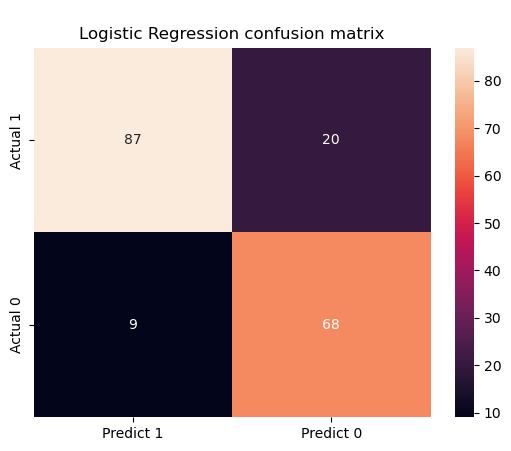

In \[53\]:

    # Naive Bayes Classifier (Gaussian Naive Bayes)
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,nb_predictions,labels=[1,0])
    df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],columns=[i for i in["Predict 1","Predict 0"]])
    plt.title('\nNaive Bayesian confusion matrix')
    sns.heatmap(df_cm,annot=True,fmt='g');
    TP=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[1,1]
    class_acc=(TP+TN)/float(TP+TN+FP+FN)
    print('Accuracy of classification:{0:0.4f}'.format(class_acc))
    nb_report = classification_report(y_test, nb_predictions)

    print("\nNaive Bayes Classification Report:")
    print(nb_report)

    Accuracy of classification:0.8424

    Naive Bayes Classification Report:
                  precision    recall  f1-score   support

               0       0.79      0.84      0.82        77
               1       0.88      0.84      0.86       107

        accuracy                           0.84       184
       macro avg       0.84      0.84      0.84       184
    weighted avg       0.84      0.84      0.84       184

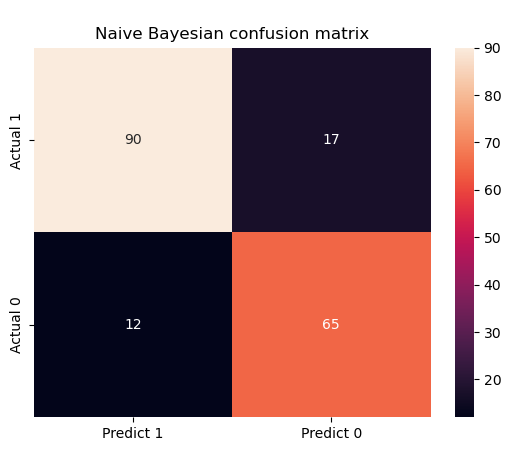

In \[54\]:

    # k-Nearest Neighbors (k-NN) Classifier
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,knn_predictions,labels=[1,0])
    df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],columns=[i for i in["Predict 1","Predict 0"]])
    plt.title('\nKNN confusion matrix')
    sns.heatmap(df_cm,annot=True,fmt='g');
    TP=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[1,1]
    class_acc=(TP+TN)/float(TP+TN+FP+FN)
    print('Accuracy of classification:{0:0.4f}'.format(class_acc))
    knn_report = classification_report(y_test, knn_predictions)

    print("\nk-Nearest Neighbors Classification Report:")
    print(knn_report)

    Accuracy of classification:0.6522

    k-Nearest Neighbors Classification Report:
                  precision    recall  f1-score   support

               0       0.58      0.62      0.60        77
               1       0.71      0.67      0.69       107

        accuracy                           0.65       184
       macro avg       0.65      0.65      0.65       184
    weighted avg       0.66      0.65      0.65       184

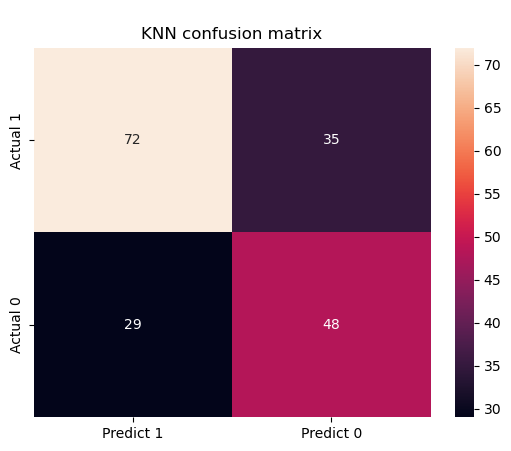

In \[55\]:

    # Support Vector Machine (SVM) Classifier
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,svm_predictions,labels=[1,0])
    df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],columns=[i for i in["Predict 1","Predict 0"]])
    plt.title('\nSVM confusion matrix')
    sns.heatmap(df_cm,annot=True,fmt='g');
    TP=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[1,1]
    class_acc=(TP+TN)/float(TP+TN+FP+FN)
    print('Accuracy of classification:{0:0.4f}'.format(class_acc))
    svm_report = classification_report(y_test, svm_predictions)

    print("\nSupport Vector Machine Classification Report:")
    print(svm_report)

    Accuracy of classification:0.8370

    Support Vector Machine Classification Report:
                  precision    recall  f1-score   support

               0       0.77      0.87      0.82        77
               1       0.90      0.81      0.85       107

        accuracy                           0.84       184
       macro avg       0.83      0.84      0.84       184
    weighted avg       0.84      0.84      0.84       184

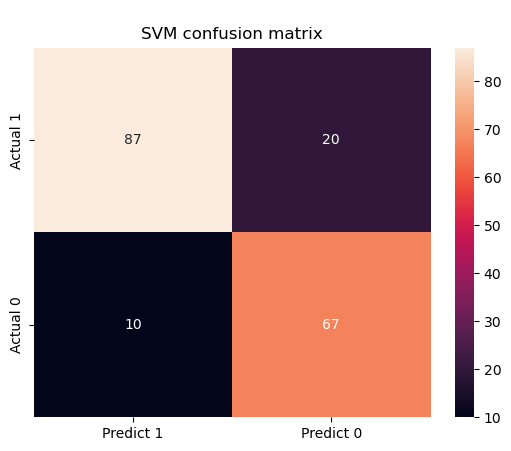

In \[56\]:

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,rf_predictions,labels=[1,0])
    df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],columns=[i for i in["Predict 1","Predict 0"]])
    plt.title('\nSVM confusion matrix')
    sns.heatmap(df_cm,annot=True,fmt='g');
    TP=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[1,1]
    class_acc=(TP+TN)/float(TP+TN+FP+FN)
    print('Accuracy of classification:{0:0.4f}'.format(class_acc))
    report = classification_report(y_test, rf_predictions)
    print("\nClassification Report:")
    print(report)

    Accuracy of classification:0.8804

    Classification Report:
                  precision    recall  f1-score   support

               0       0.86      0.86      0.86        77
               1       0.90      0.90      0.90       107

        accuracy                           0.88       184
       macro avg       0.88      0.88      0.88       184
    weighted avg       0.88      0.88      0.88       184

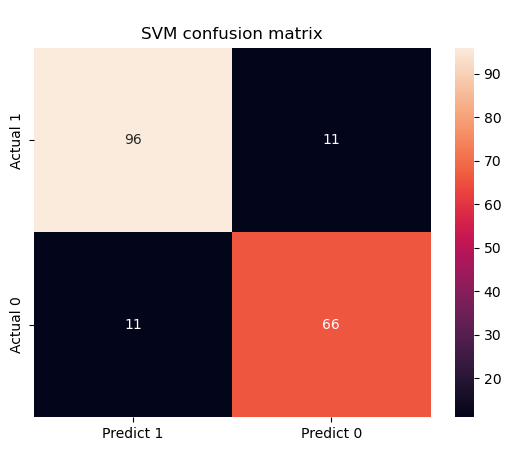

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

    F